# Retention Study - Figuring Out Which Employees May Quit
### Load HR Database Records

In [ ]:
import pandas as pd

hr_df = pd.read_csv('https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/hr_data.csv')
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [ ]:
hr_df.tail()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [ ]:
hr_df.shape

(14999, 9)

In [ ]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [ ]:
hr_df.select_dtypes(exclude=['int','float']).columns

Index(['department', 'salary'], dtype='object')

In [ ]:
print(hr_df['department'].unique())
print(hr_df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


### Load Evaluation and Employee Satisfaction Data

In [ ]:
emp_statis_eval = pd.read_excel('https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/employee_satisfaction_evaluation.xlsx')
emp_statis_eval.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [ ]:
emp_statis_eval.shape

(14999, 3)

### Merge or Join Tables

In [ ]:
main_df = hr_df.set_index('employee_id').join(emp_statis_eval.set_index('EMPLOYEE #'))
main_df = main_df.reset_index()
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [ ]:
#main_df.isnull()

In [ ]:
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


In [ ]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
main_df.fillna(main_df.mean(numeric_only=True), inplace=True)

In [ ]:
main_df

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low,0.40,0.57
14995,87673,2,160,3,0,1,0,support,low,0.37,0.48
14996,87679,2,143,3,0,1,0,support,low,0.37,0.53
14997,87681,6,280,4,0,1,0,support,low,0.11,0.96


In [ ]:
main_df.tail()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
14994,87670,2,151,3,0,1,0,support,low,0.40,0.57
14995,87673,2,160,3,0,1,0,support,low,0.37,0.48
14996,87679,2,143,3,0,1,0,support,low,0.37,0.53
14997,87681,6,280,4,0,1,0,support,low,0.11,0.96
14998,87684,2,158,3,0,1,0,support,low,0.37,0.52


In [ ]:
main_df.loc[main_df['employee_id']==20215]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
11575,20215,3,192,7,0,0,0,management,high,0.61283,0.716125


In [ ]:
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [ ]:
main_df_final = main_df.drop(columns='employee_id')
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [ ]:
main_df_final.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,satisfaction_level,last_evaluation
department,,,,,,,,,
IT,4683,248119,4256,164,273,3,mediummediummediummediummediummediumlowlowlowl...,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,mediummediummediummediummediummediummediummedi...,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,lowlowlowlowmediummediummediumlowmediummediumm...,446.68283,550.706125
hr,2701,146828,2480,89,215,15,lowlowlowlowmediummediummediumhighmediummedium...,442.53566,524.006125
management,2432,126787,2711,103,91,69,mediumlowlowlowlowlowlowmediumlowmediumlowlowl...,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,mediumlowlowlowlowlowlowlowlowlowlowlowlowlowl...,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,mediummediummediummediummediumhighlowmediummed...,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,lowmediummediumlowlowlowlowlowlowlowlowlowlowl...,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,lowlowlowlowlowlowlowlowlowlowlowlowlowlowlowl...,1377.90849,1611.534499


In [ ]:
main_df_final.groupby('department').mean(numeric_only=True)

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [ ]:
main_df_final['department'].value_counts()

,count
department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


In [ ]:
main_df_final['left'].value_counts()

,count
left,
0,11428
1,3571


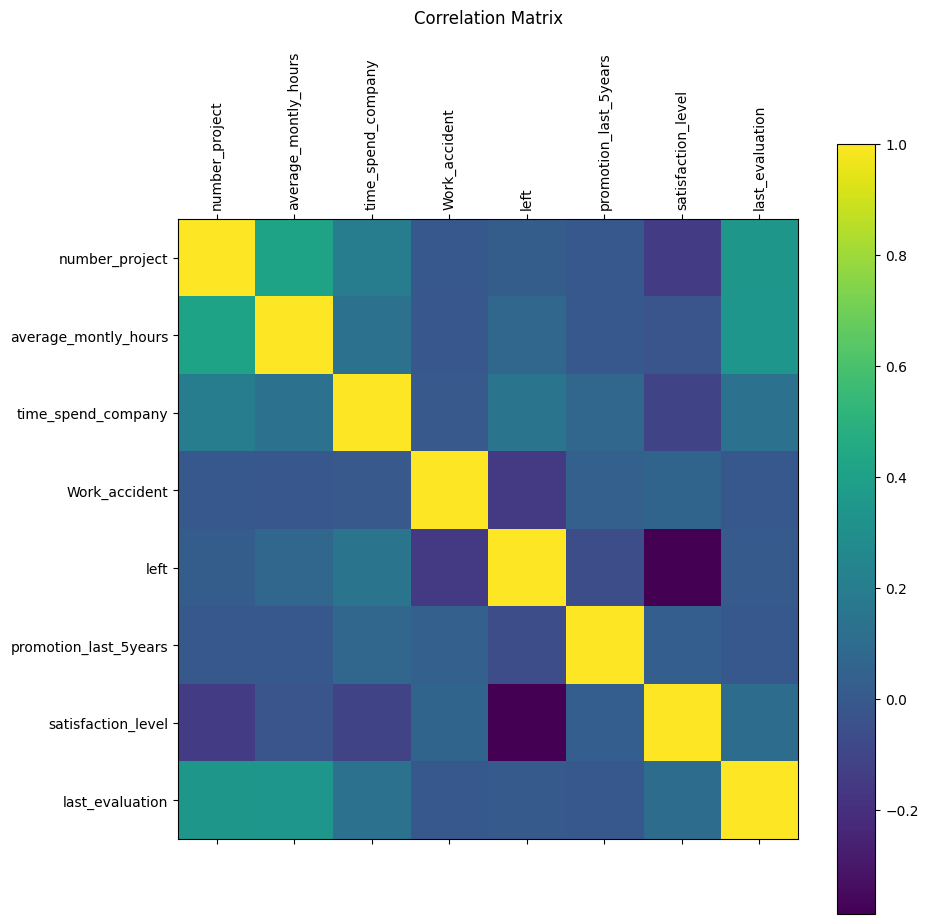

In [ ]:
import matplotlib.pyplot as plt

def plot_corr(df, size=10):
    df_numeric = df.select_dtypes(include=['float64', 'int64'])

    corr = df_numeric.corr()

    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr)
    fig.colorbar(cax)

    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.title("Correlation Matrix", pad=20)
    plt.show()

plot_corr(main_df_final)


## Prepare Dataset for ML

In [ ]:
# One-Hot encoding on Categorical Data
categorical = ['department', 'salary']

# Perform one-hot encoding
main_df_final = pd.get_dummies(main_df_final, columns=categorical, drop_first=True)

# Convert all boolean columns (created by get_dummies) to uint8
main_df_final = main_df_final.astype({col: 'uint8' for col in main_df_final.select_dtypes('bool').columns})

# Display the result
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
len(main_df_final.columns)

19

In [ ]:
len(main_df_final.loc[main_df_final['left'] ==1 ])

3571

In [ ]:
main_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number_project          14999 non-null  int64  
 1   average_montly_hours    14999 non-null  int64  
 2   time_spend_company      14999 non-null  int64  
 3   Work_accident           14999 non-null  int64  
 4   left                    14999 non-null  int64  
 5   promotion_last_5years   14999 non-null  int64  
 6   satisfaction_level      14999 non-null  float64
 7   last_evaluation         14999 non-null  float64
 8   department_RandD        14999 non-null  uint8  
 9   department_accounting   14999 non-null  uint8  
 10  department_hr           14999 non-null  uint8  
 11  department_management   14999 non-null  uint8  
 12  department_marketing    14999 non-null  uint8  
 13  department_product_mng  14999 non-null  uint8  
 14  department_sales        14999 non-null

In [ ]:
from sklearn.model_selection import train_test_split

X = main_df_final.drop(['left'], axis=1).values

y = main_df_final['left'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.164498,0.819693,-1.023329,-0.408112,-0.150322,0.877970,-0.449325,-0.238709,-0.233991,-0.227581,-0.212105,-0.245978,-0.252445,1.629223,-0.416807,-0.470362,1.027720,-0.872345
1,0.976853,1.180669,-0.339786,2.450307,-0.150322,1.080032,-0.273247,4.189209,-0.233991,-0.227581,-0.212105,-0.245978,-0.252445,-0.613789,-0.416807,-0.470362,1.027720,-0.872345
2,-1.460212,-1.045351,-0.339786,-0.408112,-0.150322,-0.859766,-1.329714,-0.238709,-0.233991,-0.227581,-0.212105,4.065408,-0.252445,-0.613789,-0.416807,-0.470362,1.027720,-0.872345
3,0.976853,0.538933,-1.023329,-0.408112,-0.150322,0.595082,0.020215,-0.238709,-0.233991,-0.227581,-0.212105,-0.245978,-0.252445,1.629223,-0.416807,-0.470362,-0.973028,-0.872345
4,0.164498,0.278228,-1.023329,-0.408112,-0.150322,0.110133,-0.977558,-0.238709,-0.233991,-0.227581,-0.212105,-0.245978,-0.252445,1.629223,-0.416807,-0.470362,1.027720,-0.872345


In [ ]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04
mean,-8.425809e-17,1.478746e-16,8.459648e-18,-6.293978e-17,2.842442e-17,1.934079e-14,2.171761e-14,-1.353544e-17,4.162147e-17,4.466694e-17,-3.451536e-17,-1.691930e-17,6.767718e-17,1.184351e-17,3.485375e-17,-9.474806e-18,1.563343e-16,5.143466e-17
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.460212e+00,-2.108225e+00,-1.023329e+00,-4.081122e-01,-1.503219e-01,-2.112553e+00,-2.092717e+00,-2.387086e-01,-2.339912e-01,-2.275813e-01,-2.121051e-01,-2.459777e-01,-2.524450e-01,-6.137894e-01,-4.168073e-01,-4.703615e-01,-9.730277e-01,-8.723453e-01
25%,-6.478567e-01,-9.049713e-01,-3.397859e-01,-4.081122e-01,-1.503219e-01,-6.981166e-01,-9.188656e-01,-2.387086e-01,-2.339912e-01,-2.275813e-01,-2.121051e-01,-2.459777e-01,-2.524450e-01,-6.137894e-01,-4.168073e-01,-4.703615e-01,-9.730277e-01,-8.723453e-01
50%,1.644982e-01,-2.258513e-02,-3.397859e-01,-4.081122e-01,-1.503219e-01,1.101328e-01,2.021530e-02,-2.387086e-01,-2.339912e-01,-2.275813e-01,-2.121051e-01,-2.459777e-01,-2.524450e-01,-6.137894e-01,-4.168073e-01,-4.703615e-01,-9.730277e-01,-8.723453e-01
75%,9.768530e-01,8.798553e-01,3.437574e-01,-4.081122e-01,-1.503219e-01,8.375572e-01,9.006037e-01,-2.387086e-01,-2.339912e-01,-2.275813e-01,-2.121051e-01,-2.459777e-01,-2.524450e-01,1.629223e+00,-4.168073e-01,-4.703615e-01,1.027720e+00,1.146335e+00
max,2.601563e+00,2.183380e+00,4.445017e+00,2.450307e+00,6.652391e+00,1.564982e+00,1.663607e+00,4.189209e+00,4.273666e+00,4.394035e+00,4.714645e+00,4.065408e+00,3.961259e+00,1.629223e+00,2.399190e+00,2.126024e+00,1.027720e+00,1.146335e+00


## Train Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print('Accuracy {0:.2f}%'.format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 78.51%
[[3166  245]
 [ 722  367]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3411
           1       0.60      0.34      0.43      1089

    accuracy                           0.79      4500
   macro avg       0.71      0.63      0.65      4500
weighted avg       0.76      0.79      0.76      4500



## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print('Accuracy {0:.2f}%'.format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 98.96%
[[3400   11]
 [  36 1053]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3411
           1       0.99      0.97      0.98      1089

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



In [ ]:
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [ ]:
main_df_final.drop(['left'],axis=1).columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [ ]:
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = pd.DataFrame(X_train).columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
5,0.330295
2,0.185358
0,0.169866
1,0.148840
6,0.121818
3,0.008969
16,0.008721
17,0.004147
13,0.003650
15,0.003630


## Deep Learning

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(9, kernel_initializer = 'uniform', activation = 'relu', input_dim=18))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 9)              │           171 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size = 10
epochs = 25

history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7817 - loss: 0.5270 - val_accuracy: 0.9013 - val_loss: 0.2789
Epoch 2/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9160 - loss: 0.2498 - val_accuracy: 0.9313 - val_loss: 0.2066
Epoch 3/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9406 - loss: 0.1900 - val_accuracy: 0.9431 - val_loss: 0.1866
Epoch 4/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9475 - loss: 0.1758 - val_accuracy: 0.9473 - val_loss: 0.1809
Epoch 5/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9522 - loss: 0.1635 - val_accuracy: 0.9456 - val_loss: 0.1786
Epoch 6/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9523 - loss: 0.1559 - val_accuracy: 0.9471 - val_loss: 0.1777
Epoch 7/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9512 - loss: 0.1600 - val_accuracy: 0.9471 - val_loss: 0.1763
Epoch 8/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9512 - loss: 0.1567 - 

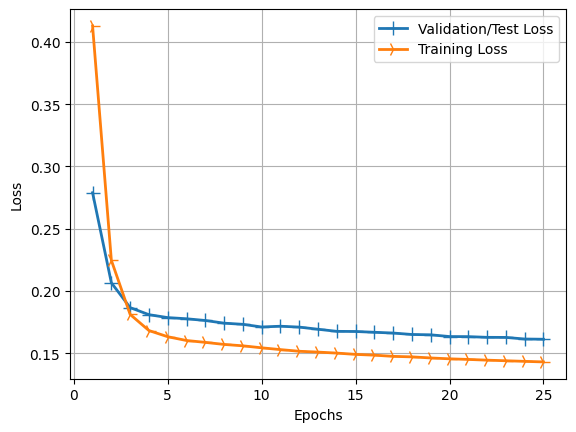

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

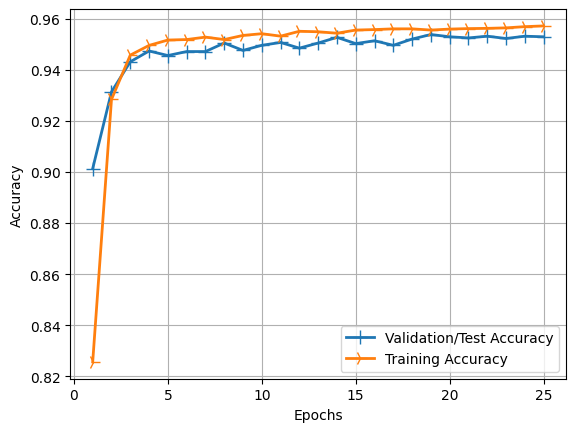

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[3306  105]
 [ 107  982]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3411
           1       0.90      0.90      0.90      1089

    accuracy                           0.95      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.95      0.95      0.95      4500



In [ ]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model2 = Sequential()

model2.add(Dense(270, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

model2.add(Dense(100, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

model2.add(Dense(90, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

model2.add(Dense(1, activation='sigmoid'))

model2.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 270)            │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 270)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        27,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 90)             │         9,090 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 90)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            91 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,411 (161.76 KB)

 Trainable params: 41,411 (161.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
batch_size = 10
epochs = 25

history = model2.fit(X_train,
                     y_train,
                     batch_size = batch_size,
                     epochs = epochs,
                     verbose = 1,
                     validation_data = (X_test, y_test))

score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8418 - loss: 1.1926 - val_accuracy: 0.9471 - val_loss: 0.2909
Epoch 2/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9401 - loss: 0.2933 - val_accuracy: 0.9338 - val_loss: 0.2723
Epoch 3/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9414 - loss: 0.2620 - val_accuracy: 0.9456 - val_loss: 0.2544
Epoch 4/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9426 - loss: 0.2613 - val_accuracy: 0.9487 - val_loss: 0.2430
Epoch 5/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9402 - loss: 0.2561 - val_accuracy: 0.9489 - val_loss: 0.2484
Epoch 6/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9430 - loss: 0.2468 - val_accuracy: 0.9489 - val_loss: 0.2364
Epoch 7/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9428 - loss: 0.2489 - val_accuracy: 0.9438 - val_loss: 0.2394
Epoch 8/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9464 - loss: 0.2442 - 

In [ ]:
predictions = model2.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[[3257  154]
 [  98  991]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3411
           1       0.87      0.91      0.89      1089

    accuracy                           0.94      4500
   macro avg       0.92      0.93      0.92      4500
weighted avg       0.95      0.94      0.94      4500

